<a href="https://www.kaggle.com/code/maushamjha/analysis-diabetes-prediction?scriptVersionId=104553700" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data=pd.read_csv('../input/pima-diabetes/pimaindians-diabetes.data.csv',names=['pregnencies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetes_pedigree','age','outcome'])

In [3]:
data.head()

,pregnencies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnencies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   bloodpressure      768 non-null    int64  
 3   skinthickness      768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

pregnencies          0
glucose              0
bloodpressure        0
skinthickness        0
insulin              0
bmi                  0
diabetes_pedigree    0
age                  0
outcome              0
dtype: int64

In [6]:
data.describe()

,pregnencies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes_pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

<AxesSubplot:>

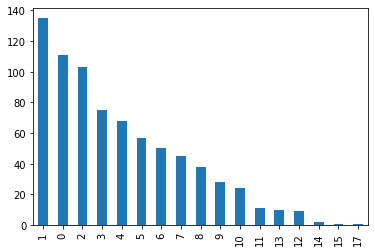

In [8]:
data['pregnencies'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

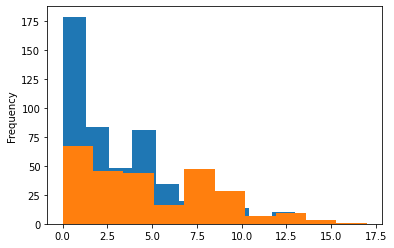

In [9]:
data[data['outcome']==0]['pregnencies'].plot(kind='hist')
data[data['outcome']==1]['pregnencies'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='age'>

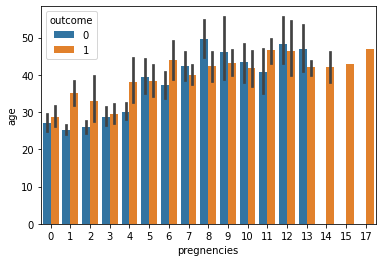

In [10]:
sns.barplot(data['pregnencies'],data['age'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies'>

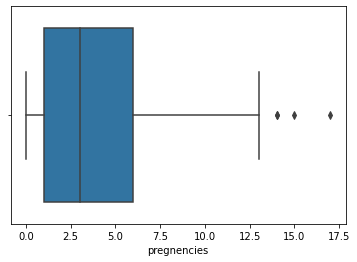

In [11]:
sns.boxplot(data['pregnencies'])# outliers are present we need to remove it

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pregnencies', ylabel='Density'>

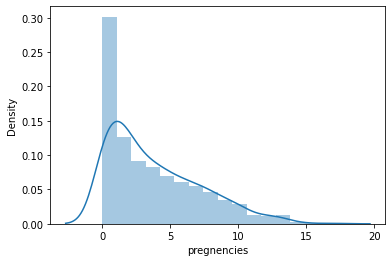

In [12]:
sns.distplot(data['pregnencies'])#right skewed data so log transformation could be applied

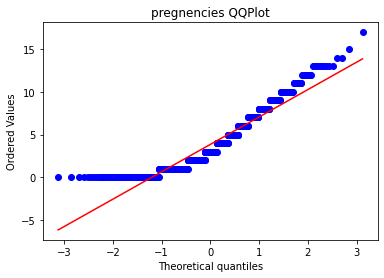

In [13]:
stats.probplot(data['pregnencies'],dist='norm',plot=plt)
plt.title('pregnencies QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pregnencies', ylabel='Density'>

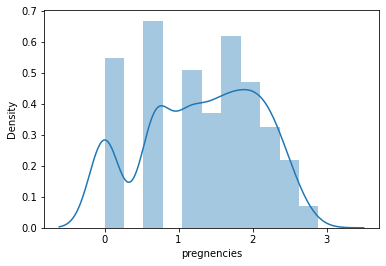

In [14]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)
data['pregnencies']=ft.fit_transform(data['pregnencies'])
sns.distplot(data['pregnencies'])


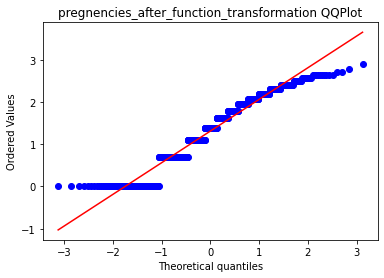

In [15]:
stats.probplot(data['pregnencies'],dist='norm',plot=plt)
plt.title('pregnencies_after_function_transformation QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies'>

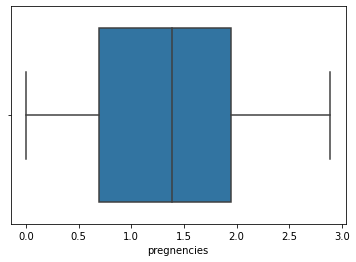

In [16]:
sns.boxplot(data['pregnencies'])

<AxesSubplot:ylabel='Frequency'>

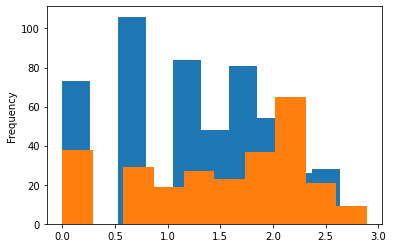

In [17]:
data[data['outcome']==0]['pregnencies'].plot(kind='hist')
data[data['outcome']==1]['pregnencies'].plot(kind='hist')

Log transformation also de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution.here data is right skewed so we have used log transformation as it can change higher value to lower value also we can't apply log transform on negative data


In [18]:
data

,pregnencies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetes_pedigree,age,outcome
0,1.945910,148,72,35,0,33.6,0.627,50,1
1,0.693147,85,66,29,0,26.6,0.351,31,0
2,2.197225,183,64,0,0,23.3,0.672,32,1
3,0.693147,89,66,23,94,28.1,0.167,21,0
4,0.000000,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,2.397895,101,76,48,180,32.9,0.171,63,0
764,1.098612,122,70,27,0,36.8,0.340,27,0
765,1.791759,121,72,23,112,26.2,0.245,30,0
766,0.693147,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='glucose', ylabel='Count'>

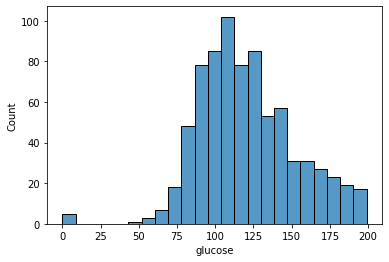

In [19]:
sns.histplot(data['glucose'])

<AxesSubplot:ylabel='Frequency'>

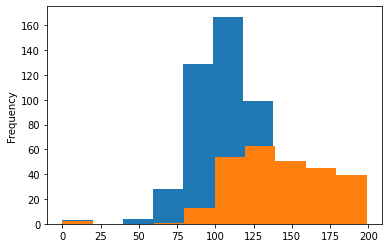

In [20]:
data[data['outcome']==0]['glucose'].plot(kind='hist')
data[data['outcome']==1]['glucose'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='glucose', ylabel='Density'>

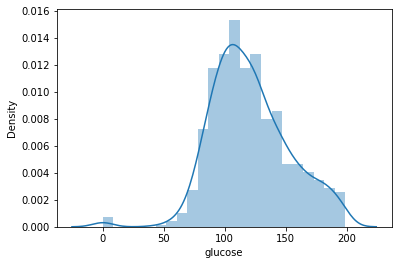

In [21]:
sns.distplot(data['glucose'])

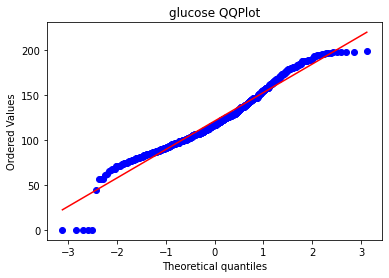

In [22]:
stats.probplot(data['glucose'],dist='norm',plot=plt)
plt.title('glucose QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='glucose'>

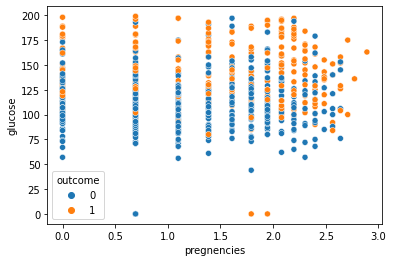

In [23]:
sns.scatterplot(data['pregnencies'],data['glucose'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='glucose'>

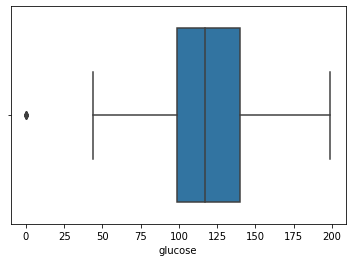

In [24]:
sns.boxplot(data['glucose'])

In [25]:
data=data[data['glucose']>0]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='glucose'>

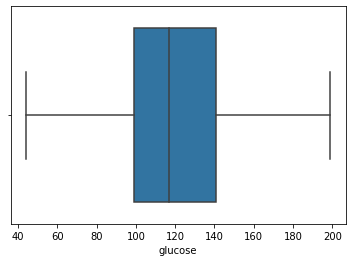

In [26]:
sns.boxplot(data['glucose'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bloodpressure', ylabel='Density'>

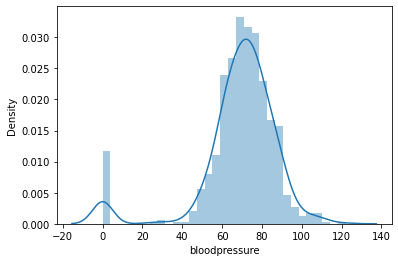

In [27]:
sns.distplot(data['bloodpressure'])

<AxesSubplot:ylabel='Frequency'>

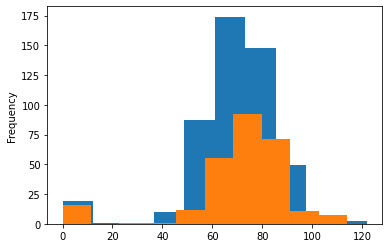

In [28]:
data[data['outcome']==0]['bloodpressure'].plot(kind='hist')
data[data['outcome']==1]['bloodpressure'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='bloodpressure'>

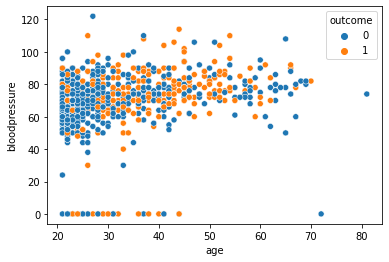

In [29]:
sns.scatterplot(data['age'],data['bloodpressure'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure'>

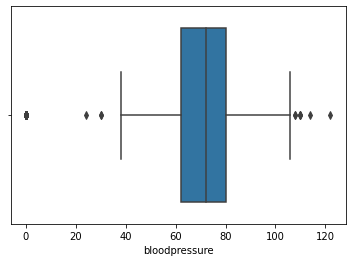

In [30]:
sns.boxplot(data['bloodpressure'])#there is an outlier

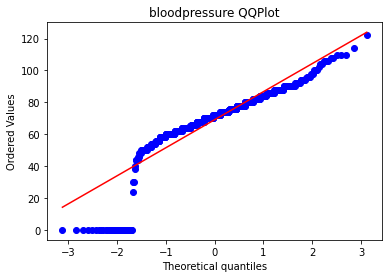

In [31]:
stats.probplot(data['bloodpressure'],dist='norm',plot=plt)
plt.title('bloodpressure QQPlot')
plt.show()

In [32]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
array=pt.fit_transform(data[['bloodpressure']])
data['bloodpressure']=pd.DataFrame(array)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


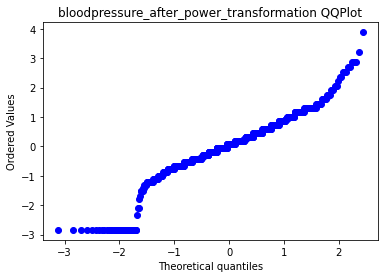

In [33]:
stats.probplot(data['bloodpressure'],dist='norm',plot=plt)
plt.title('bloodpressure_after_power_transformation QQPlot')
plt.show()

using yeo-jonson transformation on bloodpressure has made our column more normalize we can also use box cox transformation as the difference between box-cox and yeo-johnson is only that box-cox is applicable only for +ve values while yeo-johnson is applied on both.power transformation is a general transformer which can be used for left skewed as well as right skewed data,it finds out optimat lambda to make the column normal distribution


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure'>

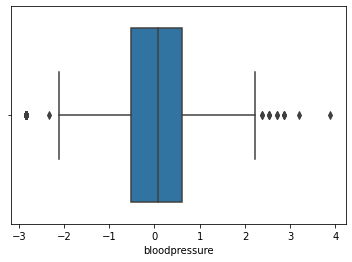

In [34]:
sns.boxplot(data['bloodpressure'])

In [35]:
#outlier treatment we can use interquartile method if data is skewed and for normally distributed we can use z-score method
q1=data['bloodpressure'].quantile(.25)
q3=data['bloodpressure'].quantile(.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
data['bloodpressure']=np.where(data['bloodpressure']>upper_limit,upper_limit,
        np.where(data['bloodpressure']<lower_limit,lower_limit,data['bloodpressure']))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure'>

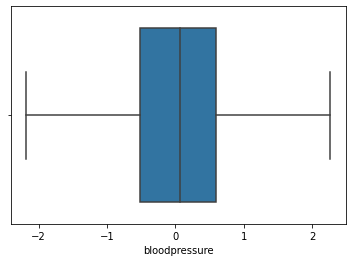

In [36]:
sns.boxplot(data['bloodpressure'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skinthickness', ylabel='Density'>

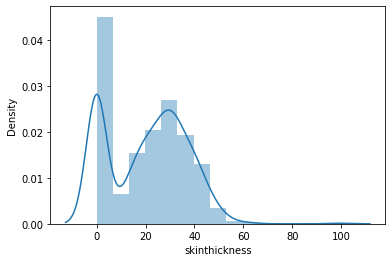

In [37]:
sns.distplot(data['skinthickness'])

<AxesSubplot:ylabel='Frequency'>

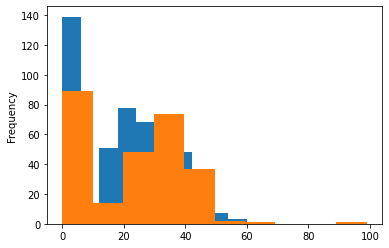

In [38]:
data[data['outcome']==0]['skinthickness'].plot(kind='hist')
data[data['outcome']==1]['skinthickness'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='skinthickness'>

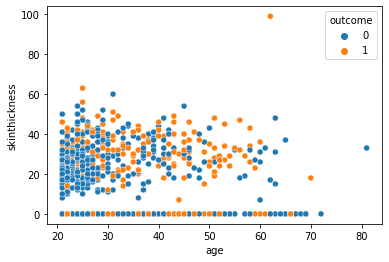

In [39]:
sns.scatterplot(data['age'],data['skinthickness'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure', ylabel='skinthickness'>

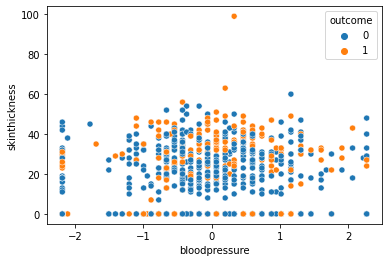

In [40]:
sns.scatterplot(data['bloodpressure'],data['skinthickness'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='skinthickness'>

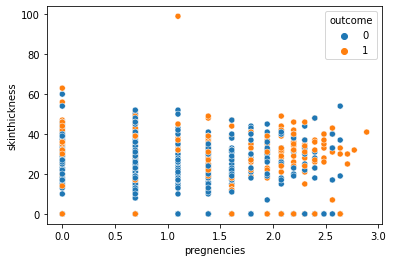

In [41]:
sns.scatterplot(data['pregnencies'],data['skinthickness'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skinthickness', ylabel='Density'>

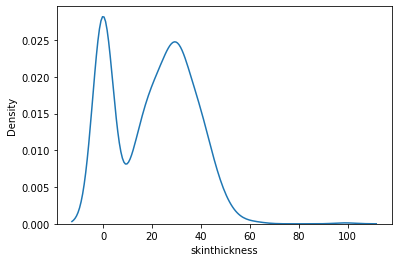

In [42]:
sns.distplot(data['skinthickness'],hist=False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='skinthickness'>

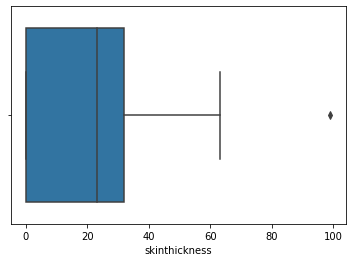

In [43]:
sns.boxplot(data['skinthickness'])

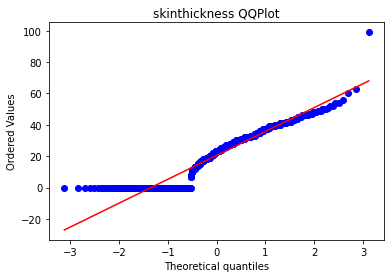

In [44]:
stats.probplot(data['skinthickness'],dist='norm',plot=plt)
plt.title('skinthickness QQPlot')
plt.show()

In [45]:
data=data[data['skinthickness']<80]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='skinthickness'>

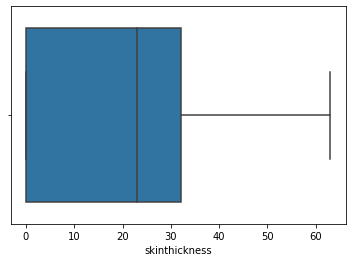

In [46]:
sns.boxplot(data['skinthickness'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insulin', ylabel='Density'>

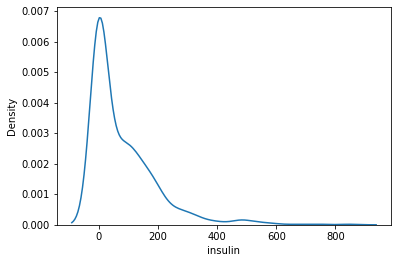

In [47]:
sns.distplot(data['insulin'],hist=False)

<AxesSubplot:ylabel='Frequency'>

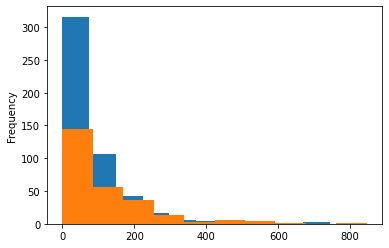

In [48]:
data[data['outcome']==0]['insulin'].plot(kind='hist')
data[data['outcome']==1]['insulin'].plot(kind='hist')

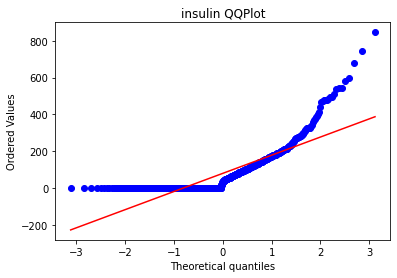

In [49]:
stats.probplot(data['insulin'],dist='norm',plot=plt)
plt.title('insulin QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='insulin'>

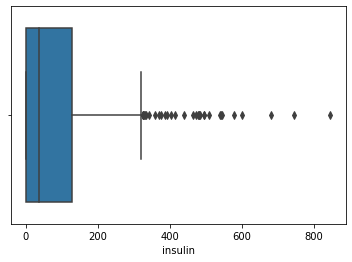

In [50]:
sns.boxplot(data['insulin'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure', ylabel='insulin'>

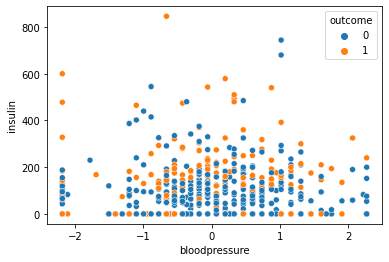

In [51]:
sns.scatterplot(data['bloodpressure'],data['insulin'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='insulin'>

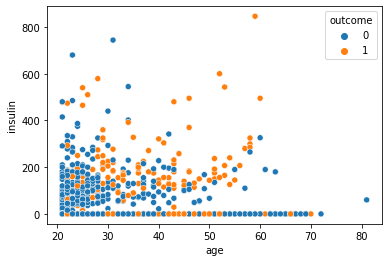

In [52]:
sns.scatterplot(data['age'],data['insulin'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='insulin'>

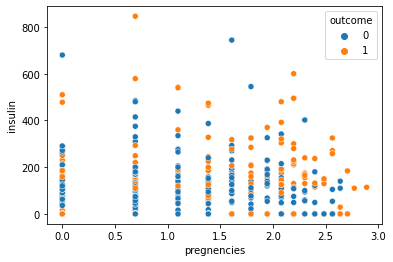

In [53]:
sns.scatterplot(data['pregnencies'],data['insulin'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insulin', ylabel='Density'>

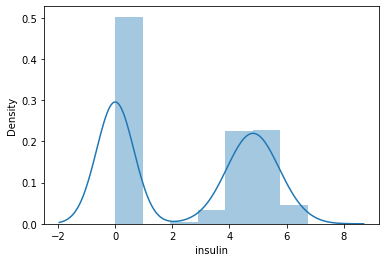

In [54]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)
data['insulin']=ft.fit_transform(data['insulin'])
sns.distplot(data['insulin'])

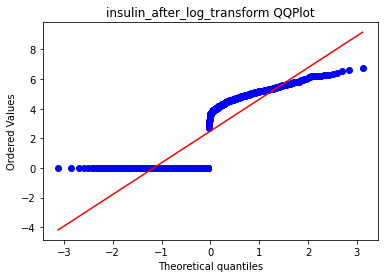

In [55]:
stats.probplot(data['insulin'],dist='norm',plot=plt)
plt.title('insulin_after_log_transform QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='insulin'>

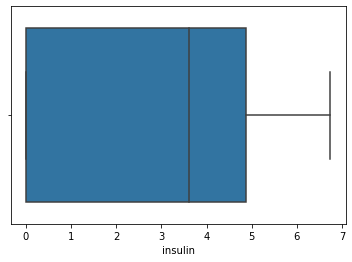

In [56]:
sns.boxplot(data['insulin'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

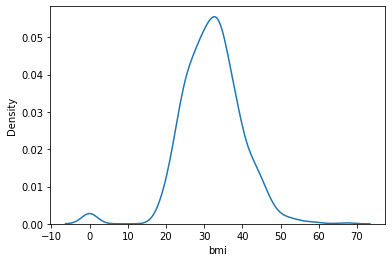

In [57]:
sns.distplot(data['bmi'],hist=False)

<AxesSubplot:ylabel='Frequency'>

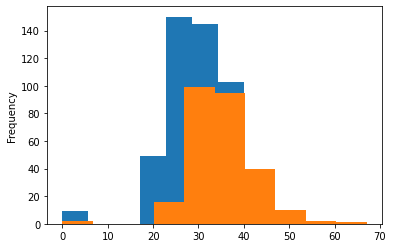

In [58]:
data[data['outcome']==0]['bmi'].plot(kind='hist')
data[data['outcome']==1]['bmi'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

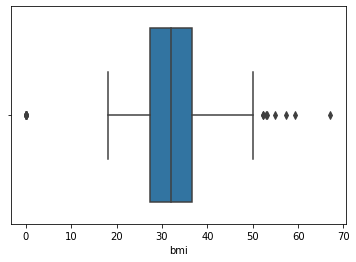

In [59]:
sns.boxplot(data['bmi'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bloodpressure', ylabel='bmi'>

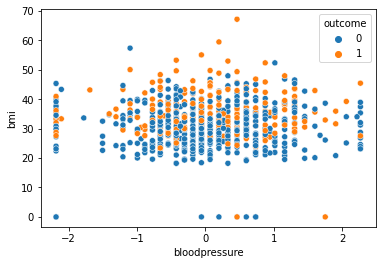

In [60]:
sns.scatterplot(data['bloodpressure'],data['bmi'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='insulin', ylabel='bmi'>

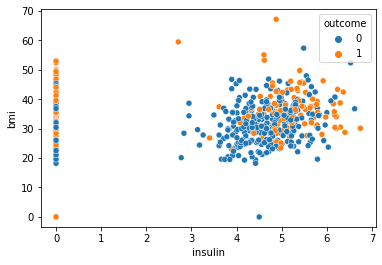

In [61]:
sns.scatterplot(data['insulin'],data['bmi'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='bmi'>

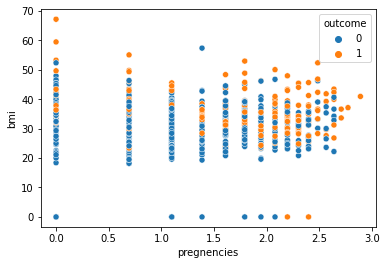

In [62]:
sns.scatterplot(data['pregnencies'],data['bmi'],hue=data['outcome'])

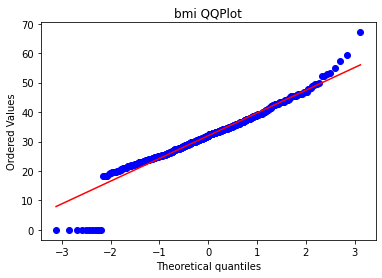

In [63]:
stats.probplot(data['bmi'],dist='norm',plot=plt)
plt.title('bmi QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

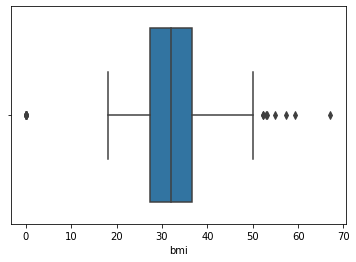

In [64]:
sns.boxplot(data['bmi'])

In [65]:
q1=data['bmi'].quantile(.25)
q3=data['bmi'].quantile(.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
data['bmi']=np.where(data['bmi']>upper_limit,upper_limit,
        np.where(data['bmi']<lower_limit,lower_limit,data['bmi']))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

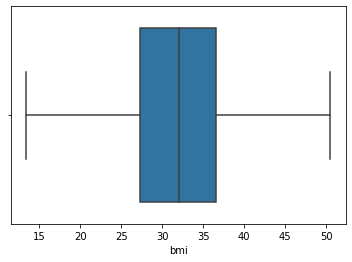

In [66]:
sns.boxplot(data['bmi'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

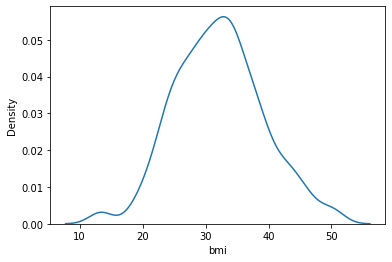

In [67]:
sns.distplot(data['bmi'],hist=False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes_pedigree', ylabel='Density'>

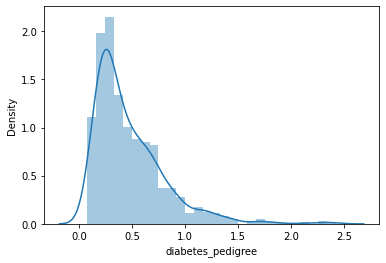

In [68]:
sns.distplot(data['diabetes_pedigree'])

<AxesSubplot:ylabel='Frequency'>

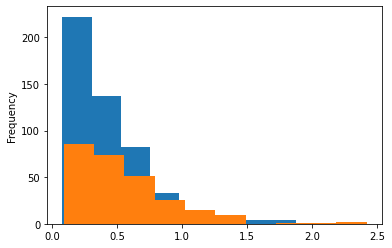

In [69]:
data[data['outcome']==0]['diabetes_pedigree'].plot(kind='hist')
data[data['outcome']==1]['diabetes_pedigree'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes_pedigree'>

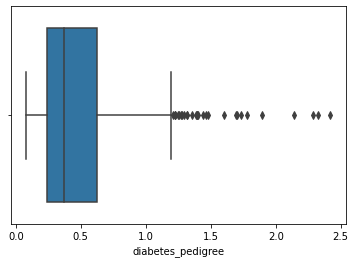

In [70]:
sns.boxplot((data['diabetes_pedigree']))

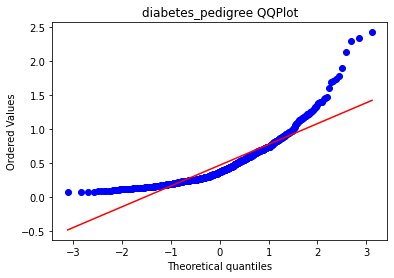

In [71]:
stats.probplot(data['diabetes_pedigree'],dist='norm',plot=plt)
plt.title('diabetes_pedigree QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='insulin', ylabel='diabetes_pedigree'>

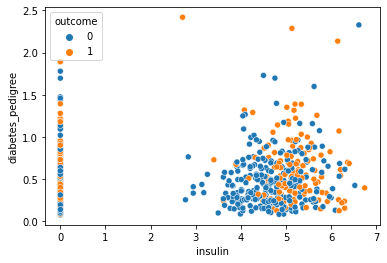

In [72]:
sns.scatterplot(data['insulin'],data['diabetes_pedigree'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='pregnencies', ylabel='diabetes_pedigree'>

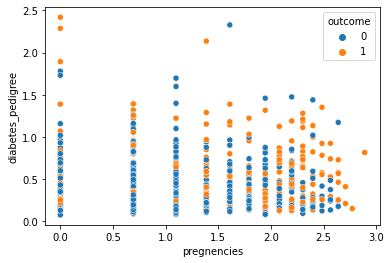

In [73]:
sns.scatterplot(data['pregnencies'],data['diabetes_pedigree'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='diabetes_pedigree'>

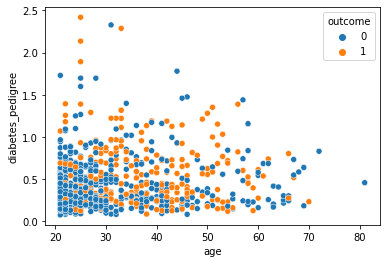

In [74]:
sns.scatterplot(data['age'],data['diabetes_pedigree'],hue=data['outcome'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes_pedigree', ylabel='Density'>

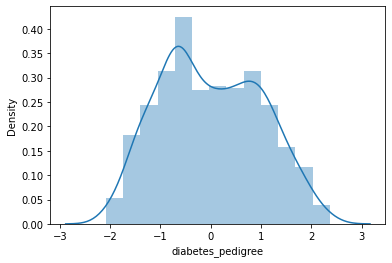

In [75]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
array=pt.fit_transform(data[['diabetes_pedigree']])
data['diabetes_pedigree']=pd.DataFrame(array)
sns.distplot(data['diabetes_pedigree'])

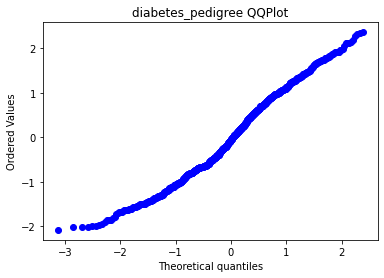

In [76]:
stats.probplot(data['diabetes_pedigree'],dist='norm',plot=plt)
plt.title('diabetes_pedigree QQPlot')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diabetes_pedigree'>

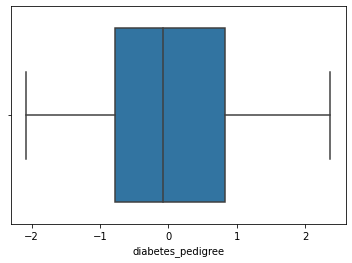

In [77]:
sns.boxplot(data['diabetes_pedigree'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

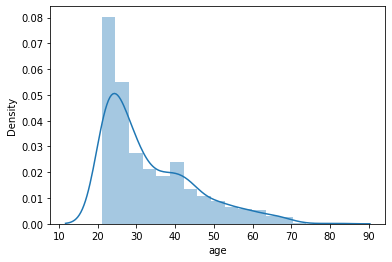

In [78]:
sns.distplot(data['age'])

<AxesSubplot:ylabel='Frequency'>

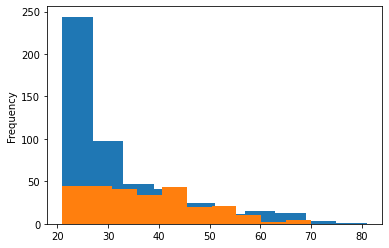

In [79]:
data[data['outcome']==0]['age'].plot(kind='hist')
data[data['outcome']==1]['age'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

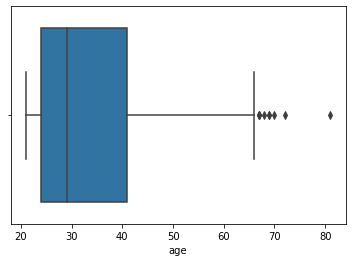

In [80]:
sns.boxplot(data['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='pregnencies'>

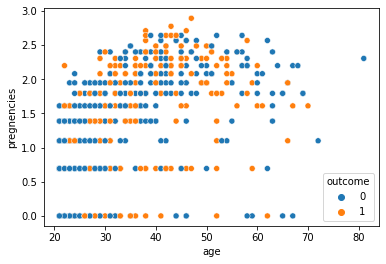

In [81]:
sns.scatterplot(data['age'],data['pregnencies'],hue=data['outcome'])

In [82]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
array=pt.fit_transform(data[['age']])
data['age']=pd.DataFrame(array)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

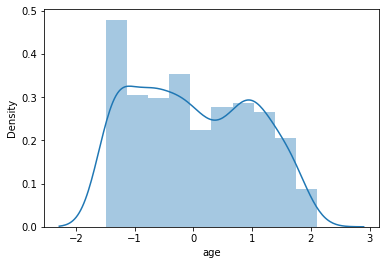

In [83]:
sns.distplot(data['age'])

<AxesSubplot:ylabel='Frequency'>

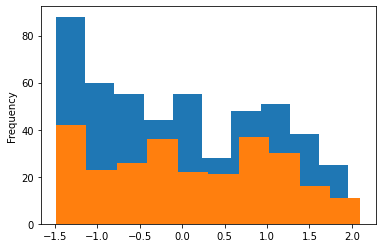

In [84]:
data[data['outcome']==0]['age'].plot(kind='hist')
data[data['outcome']==1]['age'].plot(kind='hist')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

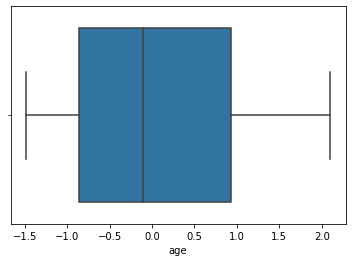

In [85]:
sns.boxplot(data['age'])

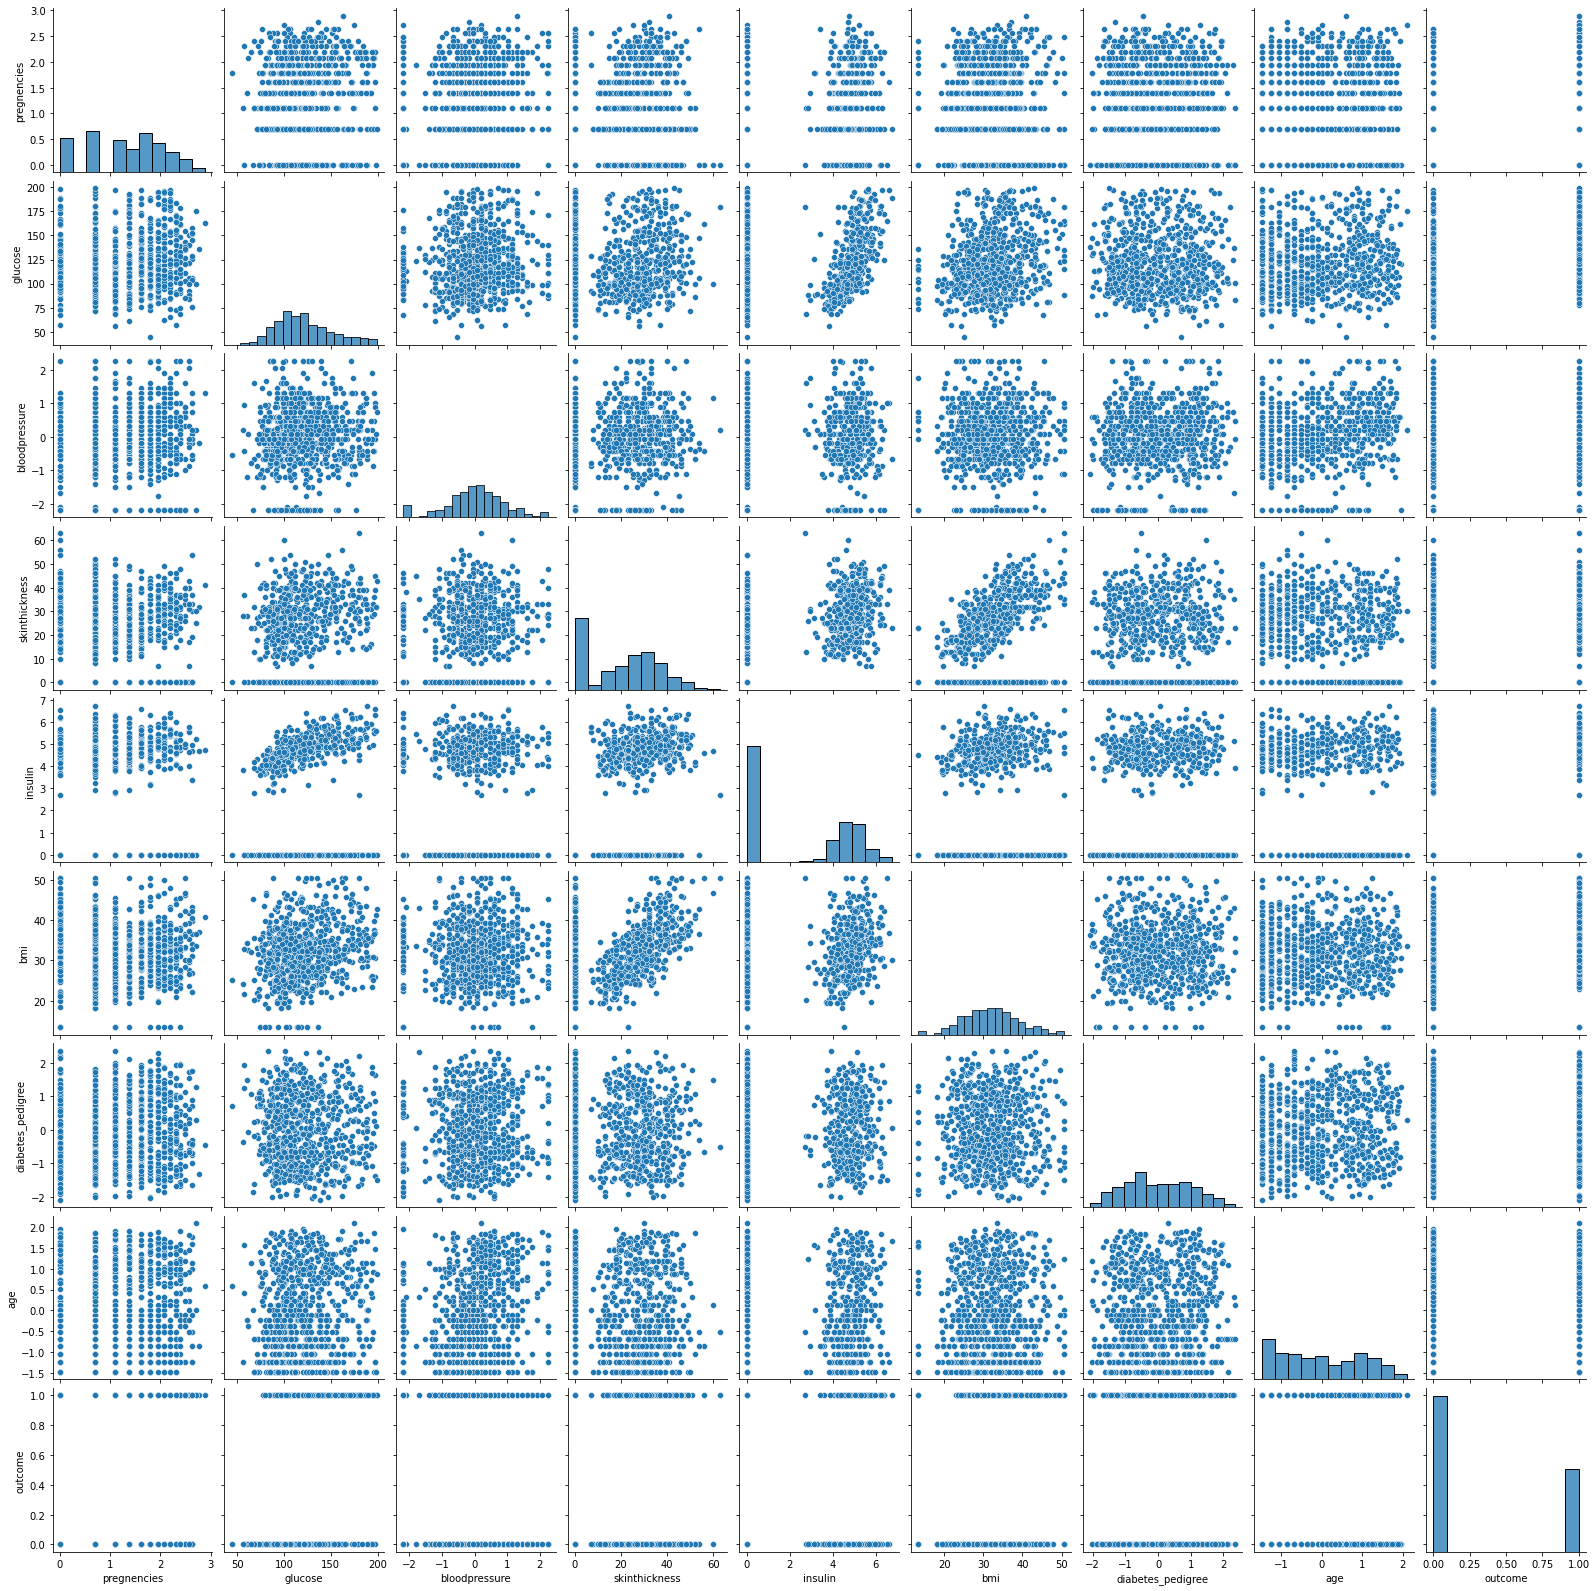

In [86]:
sns.pairplot(data)

In [87]:
data.isnull().sum()

pregnencies          0
glucose              0
bloodpressure        5
skinthickness        0
insulin              0
bmi                  0
diabetes_pedigree    6
age                  6
outcome              0
dtype: int64

In [88]:
data.dropna(inplace=True)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(data.drop(columns='outcome'))
y=data['outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2)


In [90]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [91]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()
ada=AdaBoostClassifier()
bag=BaggingClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
l=[gnb,bnb,lr,svm,dt,rf,kn,ada,bag,gb,xgb]


In [92]:
accuracy=[]
precision=[]
name=[]
def train(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    confusion_matrix(y_test,y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    name.append(model)

In [93]:
for model in l:
    train(model)

In [94]:
accuracy

[0.7828947368421053,
 0.7105263157894737,
 0.7894736842105263,
 0.7697368421052632,
 0.7368421052631579,
 0.7631578947368421,
 0.7105263157894737,
 0.75,
 0.7763157894736842,
 0.7828947368421053,
 0.756578947368421]

In [95]:
precision

[0.675,
 0.5384615384615384,
 0.6923076923076923,
 0.6428571428571429,
 0.5686274509803921,
 0.6122448979591837,
 0.5294117647058824,
 0.5957446808510638,
 0.6511627906976745,
 0.6521739130434783,
 0.5925925925925926]

In [96]:
data=pd.DataFrame({"algorithm":['gnb','bnb','lr','svm','dt','rf','knn','ada','bag','gb','xgb'],"accuracy":accuracy,"precision":precision})

In [97]:
data.sort_values('precision',ascending=False)

,algorithm,accuracy,precision
2,lr,0.789474,0.692308
0,gnb,0.782895,0.675000
9,gb,0.782895,0.652174
8,bag,0.776316,0.651163
3,svm,0.769737,0.642857
5,rf,0.763158,0.612245
7,ada,0.750000,0.595745
10,xgb,0.756579,0.592593
4,dt,0.736842,0.568627
1,bnb,0.710526,0.538462


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

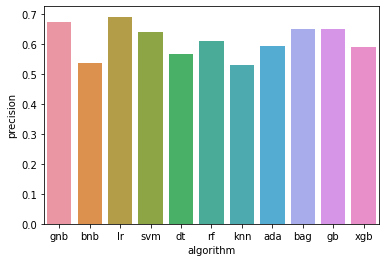

In [98]:
sns.barplot(data['algorithm'],data['precision'])
plt.xticks